In [4]:
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader,ConcatDataset
from torch.optim import Adam
import scipy.io as scio
import math
import time
from models.XSformer  import XSformer
from util.data_loader import DXS_dataset
from util.epoch_timer import epoch_time
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
path_img   =  'E:/python program/ZHX/train/fig_low/'
path_label =  'E:/python program/ZHX/train/fig_high/'
# train = DXS_dataset(path_img, path_label)
# train_batch = DataLoader(train, batch_size=100, shuffle=True)

In [5]:
Loader = DXS_dataset(path_img, path_label)
Loader_aug = DXS_dataset(path_img, path_label,IfRandomCrop= True)
Loader = ConcatDataset([Loader, Loader_aug])
train_batch = DataLoader(Loader, batch_size=100, shuffle=True)

读取到 700 张图像
读取到 700 张图像


In [6]:
print('增强数据集总数量为：', len(Loader))

增强数据集总数量为： 1400


In [7]:
for i, (image,label,name) in enumerate(train_batch):
    image_batch = image.unsqueeze(1)
    print('step :',i, ' size:', image_batch.shape)
    print(name[1])

step : 0  size: torch.Size([100, 1, 128, 128])
swivel25b
step : 1  size: torch.Size([100, 1, 128, 128])
swivel60b
step : 2  size: torch.Size([100, 1, 128, 128])
shell11b
step : 3  size: torch.Size([100, 1, 128, 128])
EiffelTower35b
step : 4  size: torch.Size([100, 1, 128, 128])
swivel70b
step : 5  size: torch.Size([100, 1, 128, 128])
EiffelTower51b
step : 6  size: torch.Size([100, 1, 128, 128])
trance_a07
step : 7  size: torch.Size([100, 1, 128, 128])
shell08b
step : 8  size: torch.Size([100, 1, 128, 128])
swivel59b
step : 9  size: torch.Size([100, 1, 128, 128])
shell19b
step : 10  size: torch.Size([100, 1, 128, 128])
shell58b
step : 11  size: torch.Size([100, 1, 128, 128])
metal60b
step : 12  size: torch.Size([100, 1, 128, 128])
metal26b
step : 13  size: torch.Size([100, 1, 128, 128])
support_a10


In [4]:
names = train.name
print(names)

['crop01b', 'crop02b', 'crop03b', 'crop04b', 'crop05b', 'crop06b', 'crop07b', 'crop08b', 'crop09b', 'crop10b', 'crop11b', 'crop12b', 'crop13b', 'crop14b', 'crop15b', 'crop16b', 'crop17b', 'crop18b', 'crop19b', 'crop20b', 'crop21b', 'crop22b', 'crop23b', 'crop24b', 'crop25b', 'crop26b', 'crop27b', 'crop28b', 'crop29b', 'crop30b', 'crop31b', 'crop32b', 'EiffelTower01b', 'EiffelTower02b', 'EiffelTower03b', 'EiffelTower04b', 'EiffelTower05b', 'EiffelTower06b', 'EiffelTower07b', 'EiffelTower08b', 'EiffelTower09b', 'EiffelTower10b', 'EiffelTower11b', 'EiffelTower12b', 'EiffelTower13b', 'EiffelTower14b', 'EiffelTower15b', 'EiffelTower16b', 'EiffelTower17b', 'EiffelTower18b', 'EiffelTower19b', 'EiffelTower20b', 'EiffelTower21b', 'EiffelTower22b', 'EiffelTower23b', 'EiffelTower24b', 'EiffelTower25b', 'EiffelTower26b', 'EiffelTower27b', 'EiffelTower28b', 'EiffelTower29b', 'EiffelTower30b', 'EiffelTower31b', 'EiffelTower32b', 'EiffelTower33b', 'EiffelTower34b', 'EiffelTower35b', 'EiffelTower36b',

(128, 128)


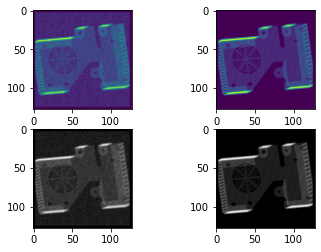

In [8]:
num = 15
I = image[num].squeeze().numpy()
L = label[num].squeeze().numpy()
print(I.shape)
plt.subplot(2,2,1)
plt.imshow(I)
plt.subplot(2,2,2)
plt.imshow(L)
plt.subplot(2,2,3)
plt.imshow(I,cmap='gray')
plt.subplot(2,2,4)
plt.imshow(L,cmap='gray')

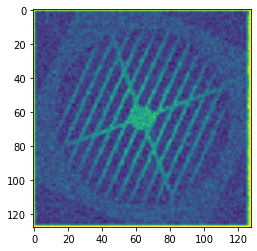

In [20]:
"""
设置模型，优化器，损失函数
"""
model    = XSformer(nhead           = nhead,
                    d_model         = d_model,
                    dim_feedforward = dim_feedforward,
                    dropout         = dropout,
                    n_layers        = n_layers,
                    mlp_hidden      = mlp_hidden,
                    LR              = LR)
optimizer = Adam(params       = model.parameters(),
                 lr           = init_lr,
                 weight_decay = weight_decay,
                 eps          = adam_eps)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,
                                                 verbose=True,
                                                 factor=factor,
                                                 patience=patience)
criterion = nn.L1Loss()
# 输出模型大小并初始化        
print(f'The model has {count_parameters(model):,} trainable parameters')
model.apply(initialize_weights)  
#out = model(x,y)

The model has 6,873 trainable parameters


<ipython-input-12-a9618ef25542>:9: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  nn.init.kaiming_uniform(m.weight.data)


XSformer(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=6, out_features=6, bias=True)
          )
          (linear1): Linear(in_features=6, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=64, out_features=6, bias=True)
          (norm1): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((6,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=6, out_features=6, bias=True)
          )
          (linear1): Linear(in_features=6, out_features=64, bias=T

In [21]:
"""
subfunction
"""
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def initialize_weights(m):
    if hasattr(m, 'weight') and m.weight.dim() > 1:
        nn.init.kaiming_uniform(m.weight.data)
        
def train(model, iterator, optimizer, criterion, clip):
    model.train()
    epoch_loss = 0
    for i, (src, trg, out) in enumerate(iterator):
        #src = batch.src
        #trg = batch.trg
        # reshape data
        src = src.view(-1,4,d_model)  #  batch*24       ---->   batch* len(4)* d_model(6)
        trg = trg.unsqueeze(1)  #  batch*d_model        ---->   batch* len(1)* d_model(6)
        x = torch.tensor(src, dtype=torch.float)
        y = torch.tensor(trg, dtype=torch.float)
        z = torch.tensor(out, dtype=torch.float)   
        # 
        optimizer.zero_grad()

        #output = model(src, trg)
        output = model(x, y)
        #output_reshape = output.contiguous().view(-1, output.shape[-1])
        #trg = trg[:, 1:].contiguous().view(-1)
        out = out.contiguous().view(-1,out.size(-1))  # batch*1*1 ----> batch*1
        z = z.contiguous().view(-1,1)               # batch ----> batch*1
        
        loss = criterion(output, z)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()
        epoch_loss += loss.item()
        print('step :', round((i / len(iterator)) * 100, 2), '% , loss :', loss.item())
    return epoch_loss / len(iterator)

def run(total_epoch, best_loss):
    train_losses, test_losses, bleus = [], [], []
    for step in range(total_epoch):
        start_time = time.time()
        train_loss = train(model, train_batch, optimizer, criterion, clip)
        end_time = time.time()
        #if step > warmup:
        #   scheduler.step(valid_loss)

        train_losses.append(train_loss)
        #test_losses.append(valid_loss)
        #bleus.append(bleu)
        epoch_mins, epoch_secs = epoch_time(start_time, end_time)
        f = open('result/train_loss.txt', 'w')
        f.write(str(train_losses))
        f.close()        
        print(f'Epoch: {step + 1} | Time: {epoch_mins}m {epoch_secs}s')
        print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
        
        

In [22]:
loader = My_dataset(filename,d_model,dataNum)
trainSet, validSet, testSet = loader.make_dataset(dataNum)
train_batch, valid_batch, test_batch = loader.make_iter(trainSet, validSet, testSet,
                                                     batchsize=batchsize) 

dataset initializing done


In [23]:
run(total_epoch=epoch, best_loss=inf)

<ipython-input-21-a9618ef25542>:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(src, dtype=torch.float)
<ipython-input-21-a9618ef25542>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(trg, dtype=torch.float)
<ipython-input-21-a9618ef25542>:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  z = torch.tensor(out, dtype=torch.float)
C:\Users\xushuo\anaconda3\envs\pytorch\lib\site-packages\torch\nn\modules\loss.py:97: UserWarning: Using a target size (torch.Size([3200])) that is different to the input size

step : 0.0 % , loss : 12.950315475463867
step : 33.33 % , loss : 12.859456062316895
step : 66.67 % , loss : 12.883637428283691
Epoch: 1 | Time: 0m 0s
	Train Loss: 12.898 | Train PPL: 399433.666
step : 0.0 % , loss : 12.944225311279297
step : 33.33 % , loss : 12.849969863891602
step : 66.67 % , loss : 12.851941108703613
Epoch: 2 | Time: 0m 0s
	Train Loss: 12.882 | Train PPL: 393188.896
step : 0.0 % , loss : 12.926239013671875
step : 33.33 % , loss : 12.843324661254883
step : 66.67 % , loss : 12.878366470336914
Epoch: 3 | Time: 0m 0s
	Train Loss: 12.883 | Train PPL: 393424.076
step : 0.0 % , loss : 12.909133911132812
step : 33.33 % , loss : 12.827638626098633
step : 66.67 % , loss : 12.842483520507812
Epoch: 4 | Time: 0m 0s
	Train Loss: 12.860 | Train PPL: 384520.360
step : 0.0 % , loss : 12.90361213684082
step : 33.33 % , loss : 12.82951831817627
step : 66.67 % , loss : 12.812938690185547
Epoch: 5 | Time: 0m 0s
	Train Loss: 12.849 | Train PPL: 380290.120
step : 0.0 % , loss : 12.8970956